In [1]:
## Homework Set #3
## Nonlinear Dynamics & Chaos -- Spring 2021
## Abhiram Kakuturu
# Full source is available at https://github.com/abhivk23/nonlinear-dynamics
import hw3
from matplotlib import pyplot as plt
import numpy as np

## TENT MAP PROBABILITY DENSITY DISTRIBUTION 
The probability distribution of successive iterations of the tent map can be written as
$$
\rho_{r} = \lim_{(P_{r+1}-P_r) \to 0} \lim_{r\to\infty} \frac{\# \space of \space P_r \in [a,b]}{{N\times (P_{r+1}-P_r)}}
$$


## LORENZ PHASE SPACE VOLUME
Consider the volume of the phase space at time $t$ to be $V(t)$ and the volume an instant later $V(t+dt)$. Applying Stokes' theorem, we can write the rate of change of the volume:
$$
V(t+dt) = V(t) + \int_{S} \dot{\vec{r}} dt \cdot \boldsymbol{\hat{\textbf{n}}}\, dA = V(t) + \int_{V} \vec{\nabla} \cdot \dot{\vec{r}} dt \, dV
$$
Now we can write the rate of change of volume as a function of time:
$$
\frac{dV}{dt} = \int_{V} \vec{\nabla} \cdot \dot{\vec{r}} \, dV
$$
Evaluating this integral:
$$
\nabla \cdot \dot{\vec{r}} = \frac{\partial}{\partial x}(-\sigma x + \sigma y) + \frac{\partial}{\partial y} (-xz-rx-y) + \frac{\partial}{\partial z} (xy-bz) = -(\sigma+b+1)
\implies 
\int_{V} \vec{\nabla} \cdot \dot{\vec{r}} \, dV = -(\sigma+b+1)\mathcal{V}
$$
where $\mathcal{V}$ is the change in volume over time. Finally integrating over time:
$$
dV = \int_{0}^{t} -(\sigma+b+1) \mathcal{V}\, dt \implies \int_{V_0}^{V} \frac{1}{\mathcal{V}}\, dV = -(\sigma+b+1)t \implies V(t) = V_0 e^{-(\sigma+b+1)t}
$$

## QUASI-PERIODICITY
**(a)** We can take a guess at the geometry of the orbit by first plotting the time-series of $x(t) = 3 \sin{t}+ \sin{\sqrt{2}t}$. A pure sinusoid can be thought of as drawing out a circle, so the linear addition of another sinusoid suggests that the geometrical object traced out by the path is some superposition of ellipses.

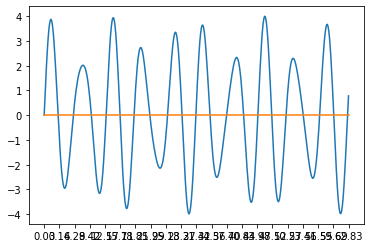

In [47]:
pi = np.pi
n = 10

t = np.linspace(0,2.*pi*n, 400)
x = 3*np.sin(t)+np.sin(np.sqrt(2)*t)
plt.plot(t,x)
plt.plot(t, [0]*len(t))

locs, labels = plt.xticks() 
plt.xticks(np.linspace(0,2.*pi*n, 2*n+1))
plt.show()

**(b)** Below we plot the orbit of delay coordinates for three different delay coordinate shifts $\tau = {-\pi, -\frac{\pi}{2}, -2\pi}$. It seems as though we approach an optimal delay around $\tau = -\frac{\pi}{2}$.

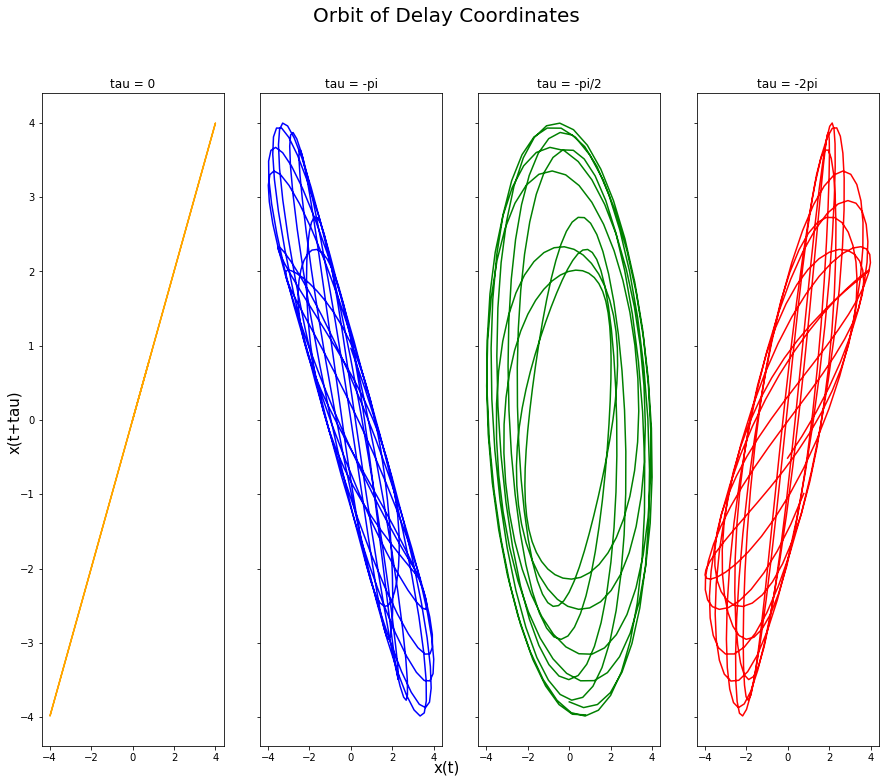

In [80]:
# \tau = -pi
t_delay1 = np.linspace(0-pi,2.*pi*n-pi, 400)
x_delay1 = 3*np.sin(t_delay1)+np.sin(np.sqrt(2)*t_delay1)

# \tau = -pi/2
t_delay2 = np.linspace(0-(pi/2.),2.*pi*n-(pi/2.), 400)
x_delay2 = 3*np.sin(t_delay2)+np.sin(np.sqrt(2)*t_delay2)

# \tau = -2*pi
t_delay3 = np.linspace(0-2*pi,2.*pi*n-2*pi, 400)
x_delay3 = 3*np.sin(t_delay3)+np.sin(np.sqrt(2)*t_delay3)

fig, ax = plt.subplots(1,4, figsize=(15,12), sharey=True)
ax[0].plot(x,x, 'orange')
ax[1].plot(x,x_delay1, 'b')
ax[2].plot(x,x_delay2, 'g')
ax[3].plot(x,x_delay3, 'r')

fig.suptitle('Orbit of Delay Coordinates', fontsize=20)
ax[0].set_title('tau = 0')
ax[1].set_title('tau = -pi')
ax[2].set_title('tau = -pi/2')
ax[3].set_title('tau = -2pi')

fig.text(0.5, 0.1, 'x(t)', ha='center', va='center', size=15)
fig.text(0.1, 0.5, 'x(t+tau)', ha='center', va='center', rotation='vertical', size=15)
plt.show()

**(c)** Now we plot the delay coordinates in three dimensions using $x(t), x(t+\tau), x(t+2\tau)$ first using our previously 'optimal' delay $\tau = -\frac{\pi}{2}$ then trying $\tau = {-\pi, -2\pi, -\pi/4}$. We gain the most geometric clarity from the $\tau = -\frac{\pi}{2}$ plot. It resembles one of the wings of Lorenz's butterfly and may point to the existence of an attractor.

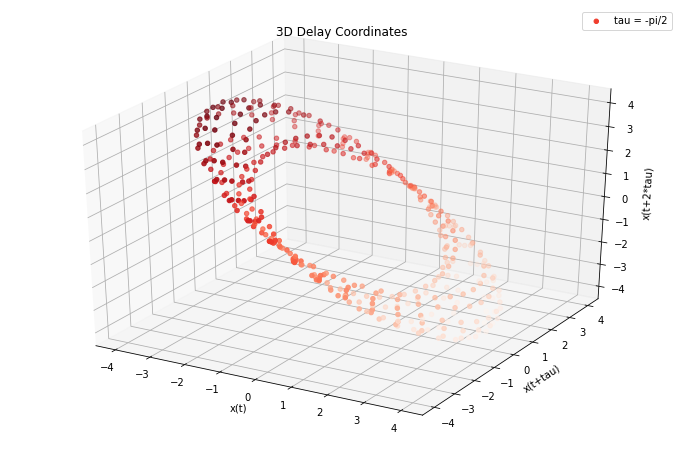

In [120]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

# x(t) vs x(t+tau) vs x(t+2*tau)
ax.scatter3D(x, x_delay2, x_delay1, c=x_delay1, cmap='Reds', label='tau = -pi/2')

ax.set_xlabel('x(t)')
ax.set_ylabel('x(t+tau)')
ax.set_zlabel('x(t+2*tau)')
ax.set_title('3D Delay Coordinates')
ax.legend()

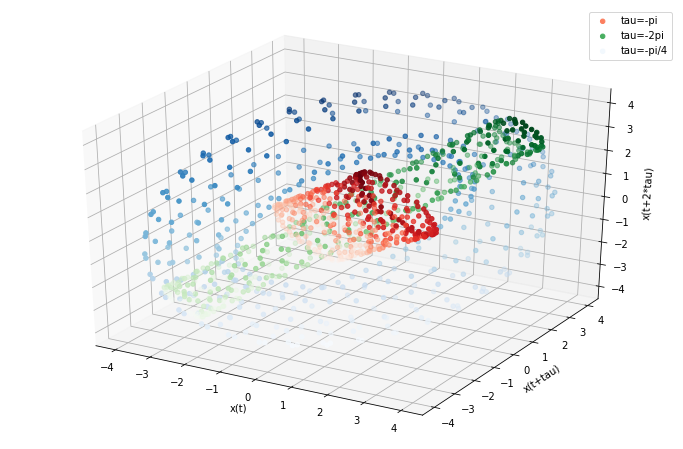

In [119]:
# Some other values of tau = {-pi, -2*pi, -pi/4}

# tau = -4pi
t_delay4 = np.linspace(0-4*pi,2.*pi*n-4*pi, 400)
x_delay4 = 3*np.sin(t_delay4)+np.sin(np.sqrt(2)*t_delay4)

# tau = -pi/4
t_delay5 = np.linspace(0-pi/4,2.*pi*n-pi/4, 400)
x_delay5 = 3*np.sin(t_delay5)+np.sin(np.sqrt(2)*t_delay5)



# x(t) vs x(t+tau) vs x(t+2*tau)
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(x, x_delay1, x_delay3, c=x_delay3, cmap='Reds', label='tau=-pi') # tau = -pi
ax.scatter3D(x, x_delay3, x_delay4, c=x_delay4, cmap='Greens', label='tau=-2pi') # tau = -2*pi
ax.scatter3D(x, x_delay5, x_delay2, c=x_delay2, cmap='Blues', label='tau=-pi/4') # tau = -pi/4

ax.set_xlabel('x(t)')
ax.set_ylabel('x(t+tau)')
ax.set_zlabel('x(t+2*tau)')

ax.legend()